# Peak Magnetic Field Strength

Magnetic models of young stars have their peak magnetic field strength prescribed where $R = 0.5 R_{\star}$. This works well and permits models of young stars with strong surface magnetic fields ($\langle{\rm B}f\rangle$) to converge and evolve without issue. We can understand this by plotting how the peak magnetic field strength varies as a function of depth in the dipole magnetic field models. The magnetic field profile in this case is prescribed to be

\begin{equation}
    B(R) = B_{\rm surf} \left(\frac{R_{\star}}{R}\right)^3.
\end{equation}

We can therefore easily visualize the peak magnetic field strength as a function of the surface magnetic field strength and the cut-off radius where we define the peak strength. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [8]:
radial_points  = np.arange(0.01, 1.0, 0.01)  # units of Rstar
bfield_scaling = radial_points**(-3.0)       # see equation (1)
bfield_surface = np.arange(0.5, 4.1, 0.5)    # units of kiloGauss

which leads to the following figure,

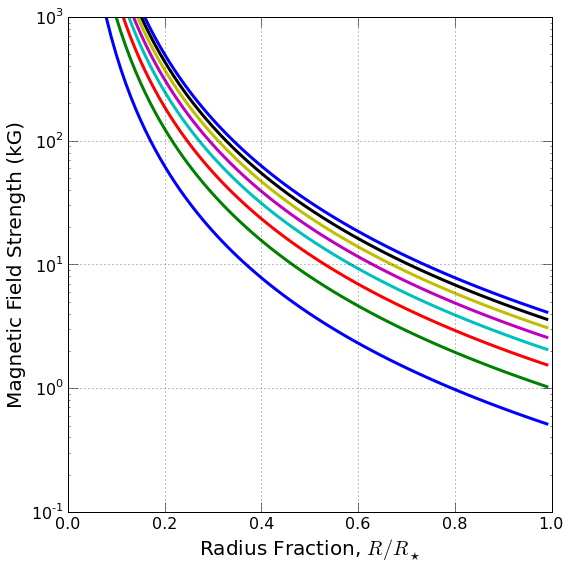

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8.0, 8.0))

# configure axis labels and limits
ax.set_xlabel('Radius Fraction, $R/R_{\\star}$', fontsize=20.)
ax.set_ylabel('Magnetic Field Strength (kG)', fontsize=20.)
ax.set_ylim(0.1, 1.0e3)
ax.tick_params(which='major', axis='both', length=10.0, labelsize=16.)
ax.grid(True)

for bf in bfield_surface:
    ax.semilogy(radial_points, bf*bfield_scaling, '-', lw=3)

fig.tight_layout()

It is clear that interior magnetic field strengths remain below 100 kG for all values of the surface field strength when the peak magnetic field strength is assigned to a radial fraction greater than approximately $0.40 R_{\star}$. These values for magnetic field strengths ($< 100 \textrm{ kG}$) permit convergence as they produce values of the magnetic pressure and magnetic energy density that are well below values for the gas pressure and the internal energy of the ambient plasma.

This is important to understand once we introduce magnetic fields in young stars that later develop a radiative core during their pre-main-sequence evolution. Since the code was initially designed to treat the effects of magnetic fields in main-sequence stars, the development of a radiative core was not explicitly considered. Instead, radiative cores existed prior to the inclusion of a magnetic field. Since maost stars have radiative cores that extend no lower than $0.40 R_{\star}$, there was no need to be concerned about convergence outside of strong surface magnetic fields. As a result, we _defined_ the peak magnetic field strength to occur at the base of the tachocline (radiative-convection zone interface).

Fully convective stars were assigned peak magnetic field strengths at $0.30 R_{\star}$, which is just beyond the maximum depth observed for the convection zone in partially convective stars and is also where the peak magnetic field strength appeared (a very slight peak) in 3D MHD models of fully convective dynamos ([Browning et al. 2008](http://adsabs.harvard.edu/abs/2008ApJ...676.1262B)). 

Pre-main-sequence stars therefore pose an interesting problem: star that eventually become partially convective on the main sequence start off as fully convective stars along the Hyashi track. However, once a radiative core begins developing at the beginning of the Henyey track, the peak magnetic field strength jumps from $0.50 R_{\star}$ to $0.12 R_{\star}$, which causes an immense increase in the peak magnetic field strength. Such a deep convection zone is not seen in main-sequence low-mass stars (they'd become fully convective, instead). We therefore need to control for the evolutionary development of a radiative core and the receding convection zone boundary.

---

## Revising the Boundary Definition

Possible solutions:
 - Define all peak magnetic field strengths at the tachocline or $0.5 R_{\star}$, whichever is larger.
 - Define the peak magnetic field strength at $(R_{\star} - R_{\rm bcz}) / 2$.